<a href="https://colab.research.google.com/github/FilippMaksimov/Net.Statistics/blob/main/Stat_Maksimov_F_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-info">
<b>Задание № 1:</b>
    
- Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор
- Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)
- Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)
- Постройте модель LDA
- Рассчитайте точность вашей модели на тестовой выборке

</div>

In [ ]:
df1 = pd.read_csv('possum.csv')
df1.dropna(inplace=True)
df1.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1['Pop'])
le.classes_

array(['Vic', 'other'], dtype=object)

In [ ]:
data_class = le.transform(df1['Pop'])
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data1 = df1.iloc[:, 4:]
x_train, x_test, y_train, y_test = train_test_split(data1, data_class, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)


LinearDiscriminantAnalysis()

In [ ]:
result = pd.DataFrame([y_test, lda.predict(x_test)]).T
result.head(10)

,0,1
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [ ]:
#Проверка точности
accuracy_score(y_test, lda.predict(x_test))

1.0

<div class="alert alert-info">
<b>Задание № 2:</b>
    
- Выберите и оставьте только те признаки, по которым будете проводить кластерный анализ.
- Подберите оптимальное число кластеров для алгоритма K-means.
- Визуализируйте полученную кластеризацию.
- Проверьте правильность выбора кластеров с помощью метода локтя.
- Примените алгомеративную кластеризацию с учётом рассчитанного методом локтя оптимального количества кластеров
- Визуализируйте результат.

</div>

In [ ]:
df2 = pd.read_csv('Country-data.csv')
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


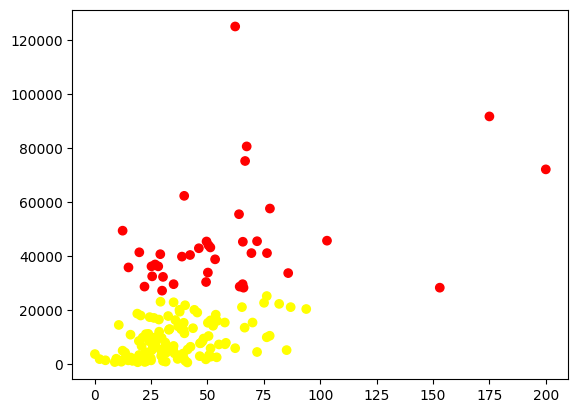

In [ ]:
from sklearn.cluster import KMeans

x = df2[['exports', 'income']]
#Алгоритм k-средних
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(x)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], cmap='autumn', c=clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

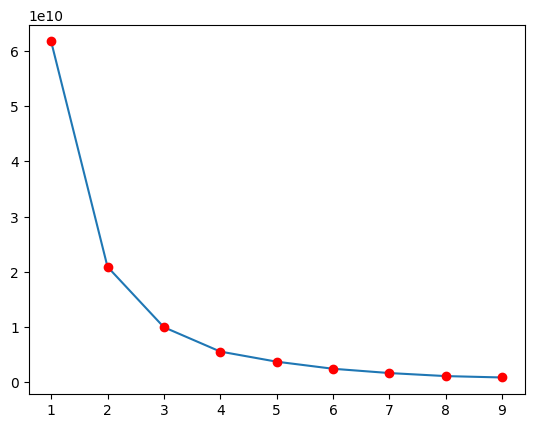

In [ ]:
#график локтя
k_inertia = []
ks = range(1, 10)
for k in ks:
  clf_means = KMeans(n_clusters=k)
  clusters_kmenas = clf_means.fit_predict(x)
  k_inertia.append(clf_means.inertia_)
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro')

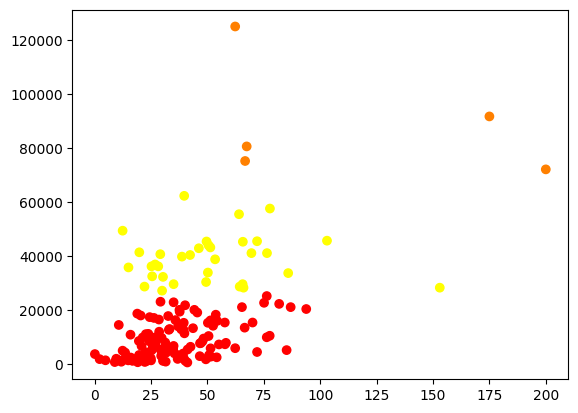

In [ ]:
#Исходя из графика локтя можно сделать вывод, что оптимальное число кластеров равно 3.
#Теперь можно применить алгомеративную кластеризацию
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(x)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], cmap='autumn', c=clusters)